In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("nhgh.tsv", sep="\t")

### Visualization for Outliers

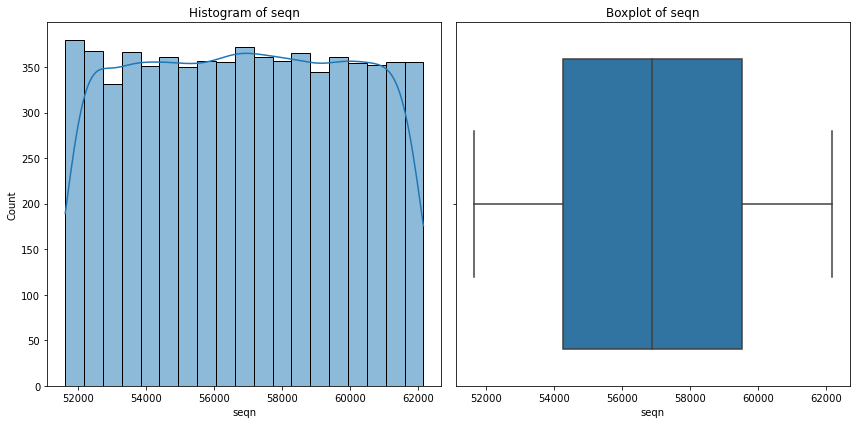

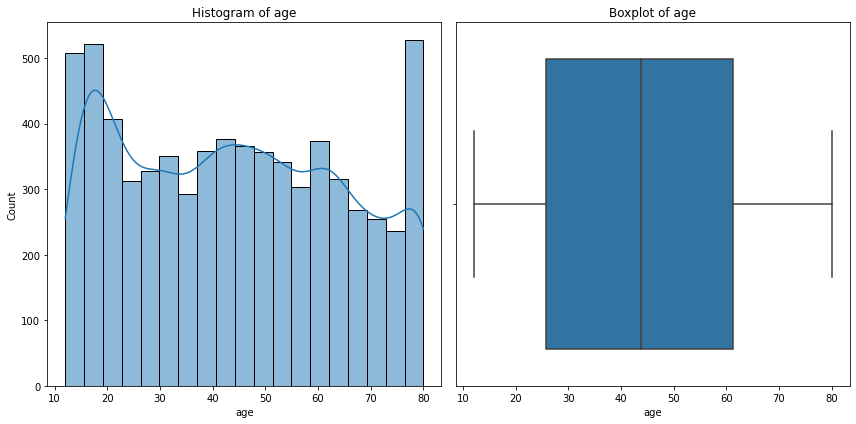

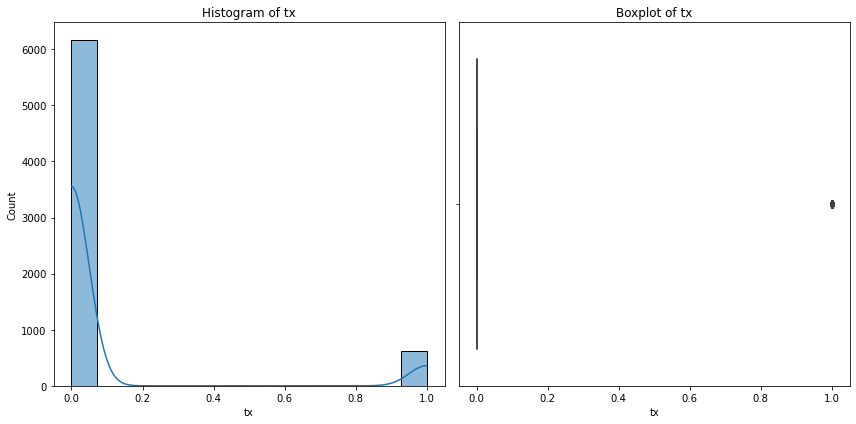

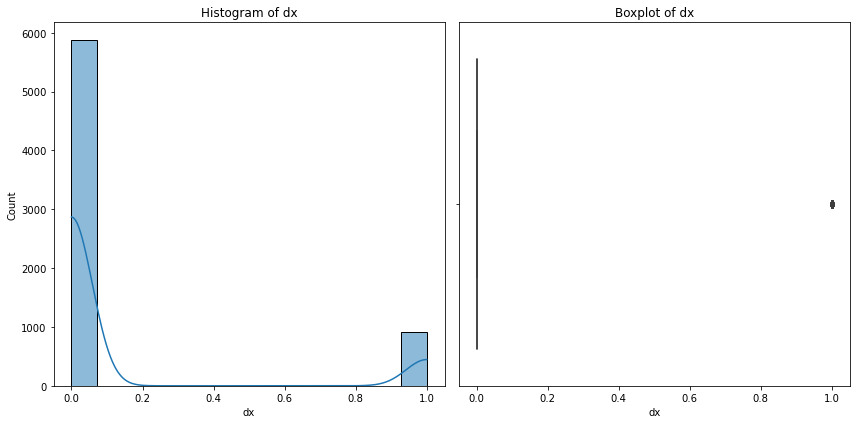

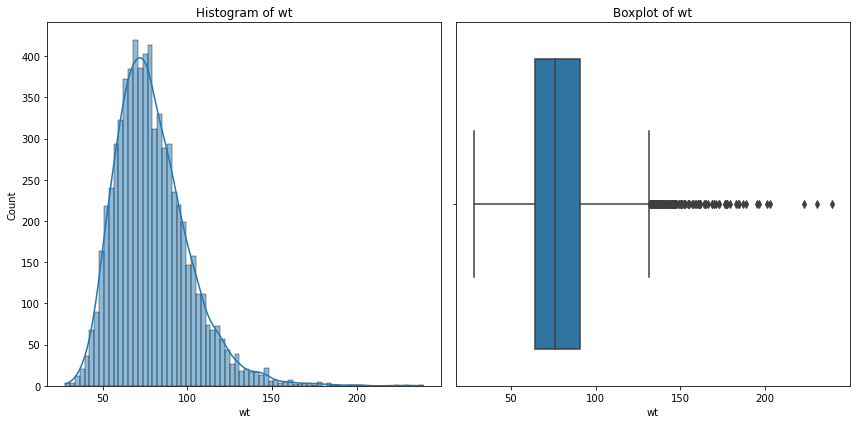

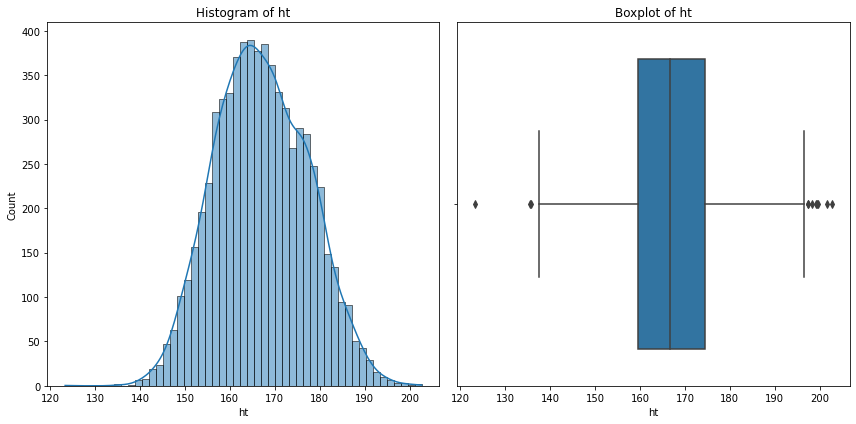

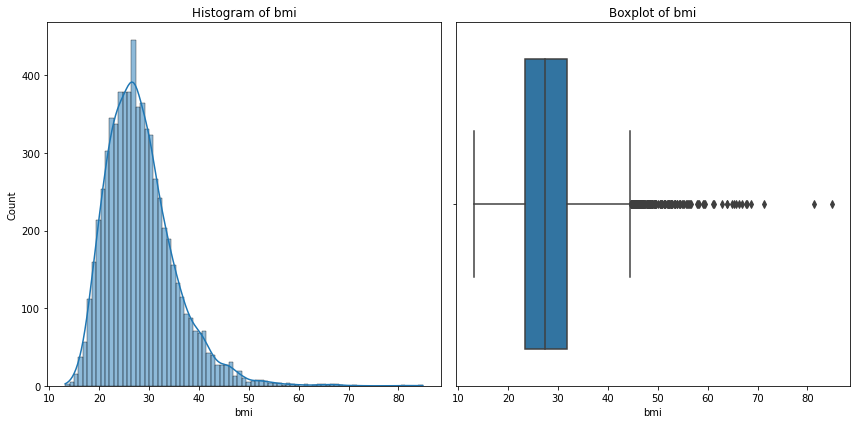

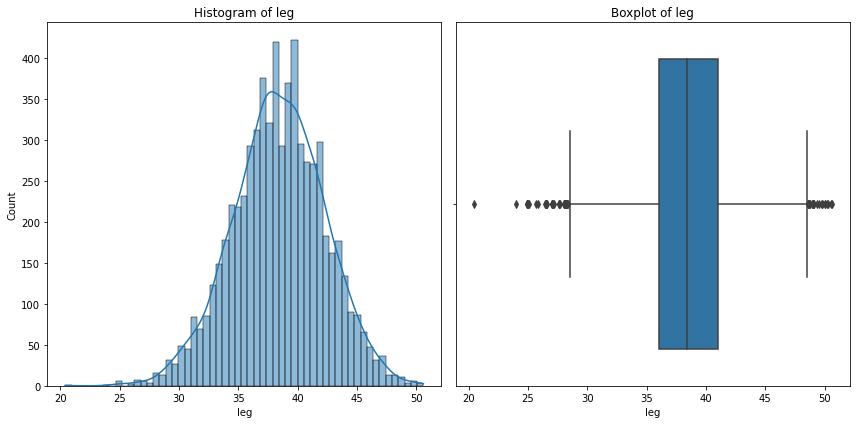

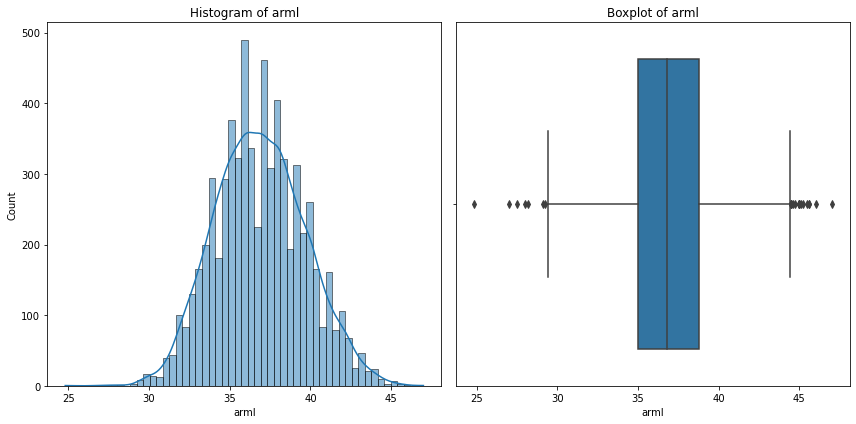

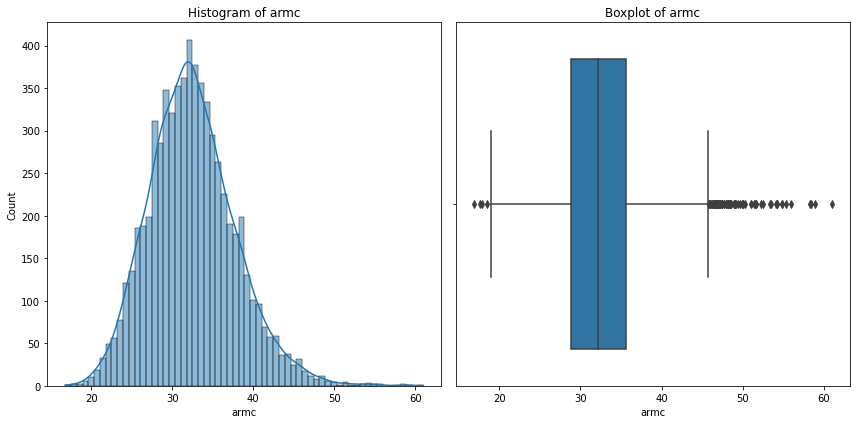

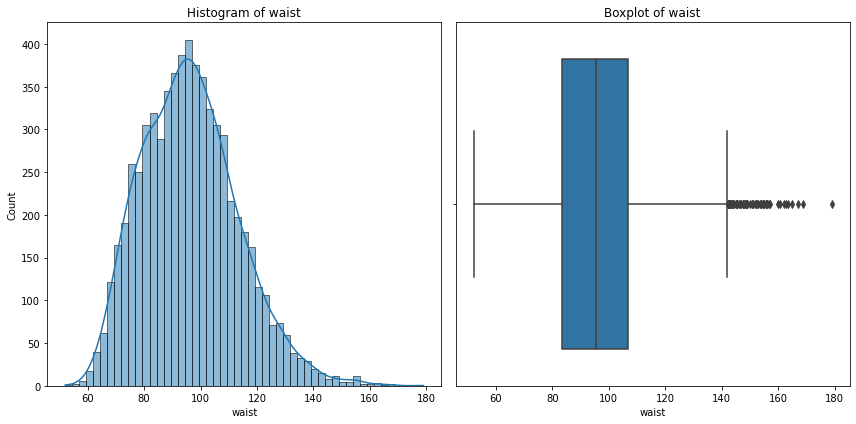

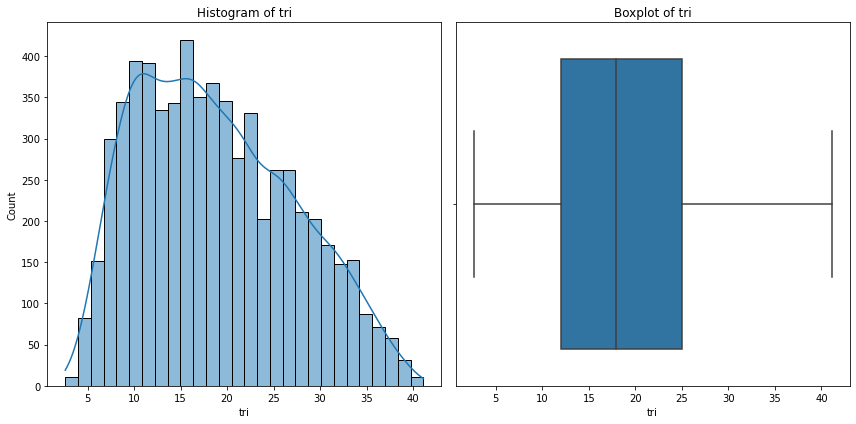

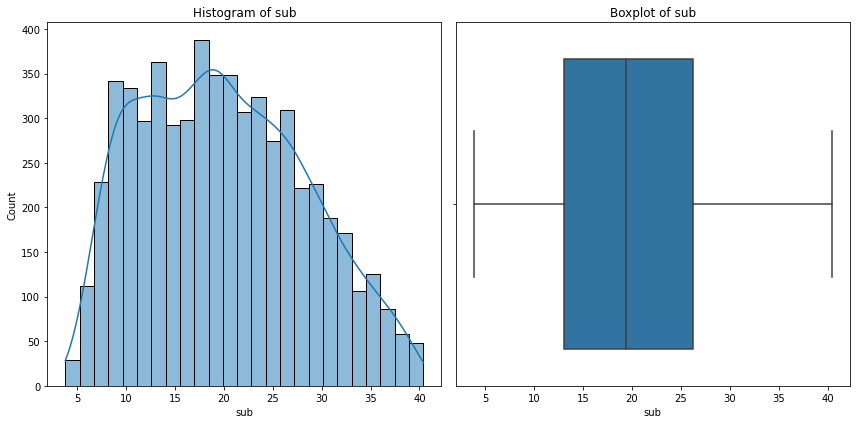

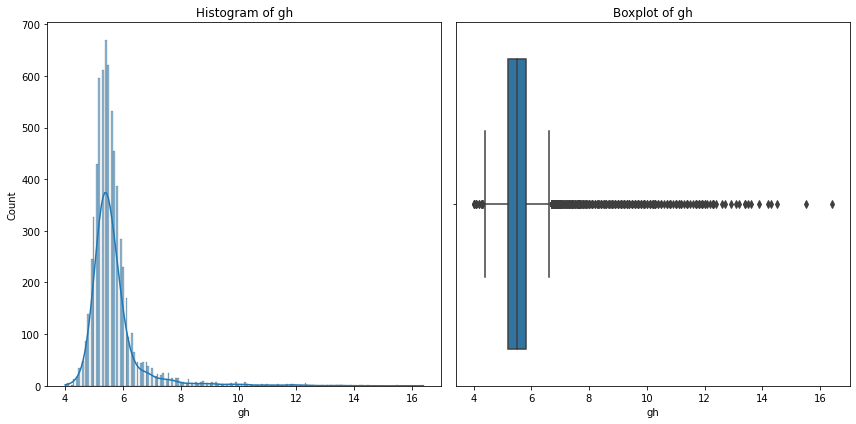

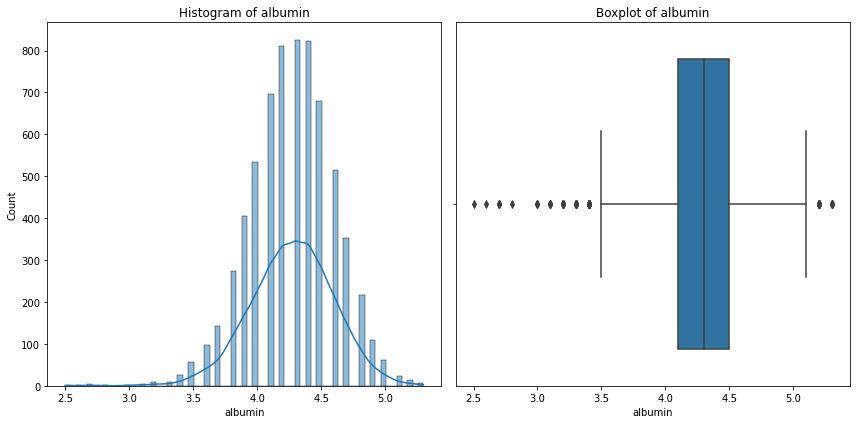

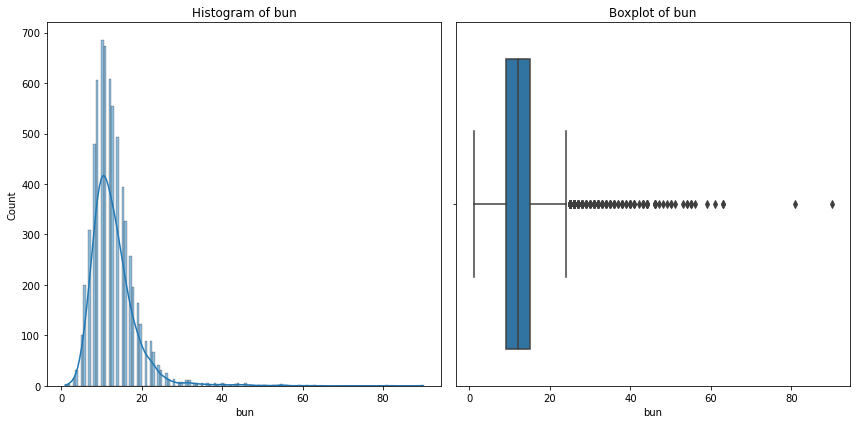

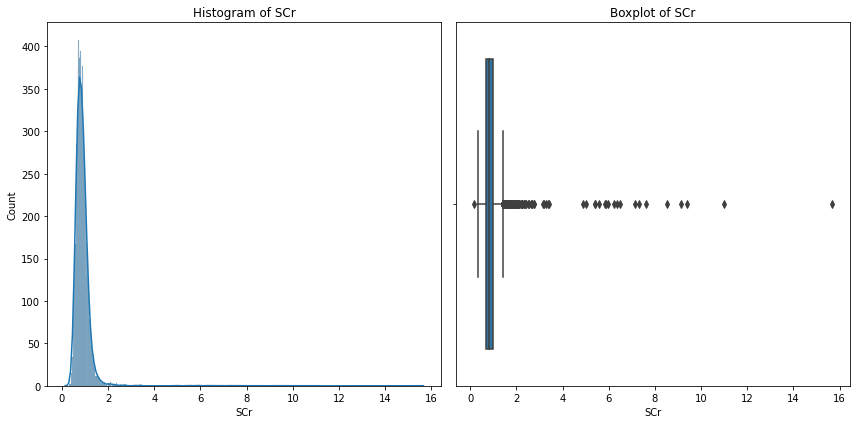

In [3]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms and boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

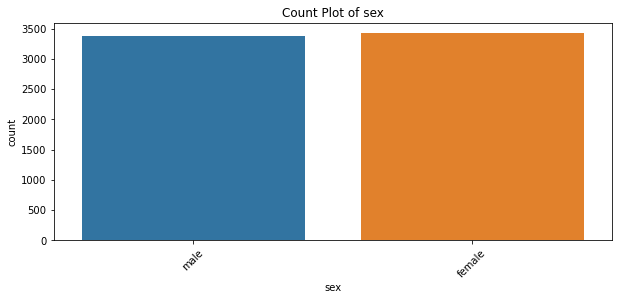

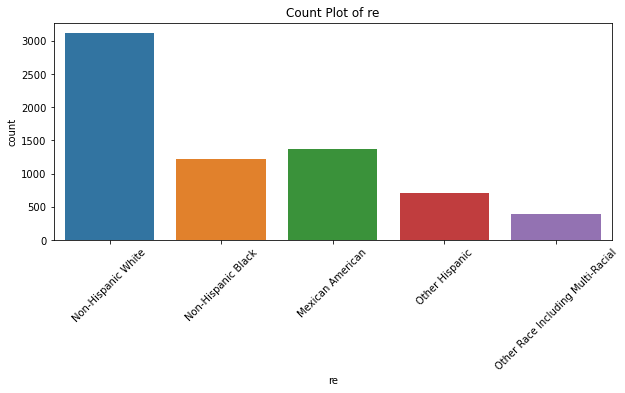

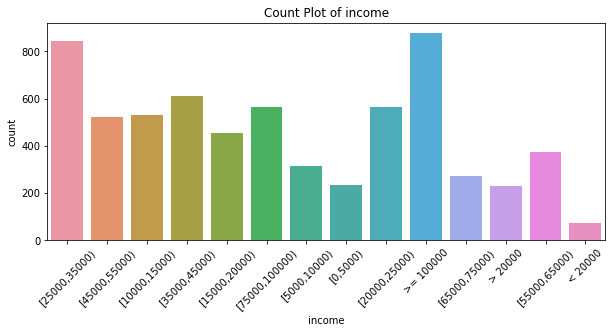

In [4]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

# Plot count plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [5]:
df.head(5)

,seqn,sex,age,re,income,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr
0,51624,male,34.166667,Non-Hispanic White,"[25000,35000)",0,0,87.4,164.7,32.22,41.5,40.0,36.4,100.4,16.4,24.9,5.2,4.8,6.0,0.94
1,51626,male,16.833333,Non-Hispanic Black,"[45000,55000)",0,0,72.3,181.3,22.00,42.0,39.5,26.6,74.7,10.2,10.5,5.7,4.6,9.0,0.89
2,51628,female,60.166667,Non-Hispanic Black,"[10000,15000)",1,1,116.8,166.0,42.39,35.3,39.0,42.2,118.2,29.6,35.6,6.0,3.9,10.0,1.11
3,51629,male,26.083333,Mexican American,"[25000,35000)",0,0,97.6,173.0,32.61,41.7,38.7,37.0,103.7,19.0,23.2,5.1,4.2,8.0,0.80
4,51630,female,49.666667,Non-Hispanic White,"[35000,45000)",0,0,86.7,168.4,30.57,37.5,36.1,33.3,107.8,30.3,28.0,5.3,4.3,13.0,0.79


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   seqn     6795 non-null   int64  
 1   sex      6795 non-null   object 
 2   age      6795 non-null   float64
 3   re       6795 non-null   object 
 4   income   6475 non-null   object 
 5   tx       6795 non-null   int64  
 6   dx       6795 non-null   int64  
 7   wt       6795 non-null   float64
 8   ht       6795 non-null   float64
 9   bmi      6795 non-null   float64
 10  leg      6564 non-null   float64
 11  arml     6616 non-null   float64
 12  armc     6607 non-null   float64
 13  waist    6556 non-null   float64
 14  tri      6314 non-null   float64
 15  sub      5824 non-null   float64
 16  gh       6795 non-null   float64
 17  albumin  6706 non-null   float64
 18  bun      6706 non-null   float64
 19  SCr      6706 non-null   float64
dtypes: float64(14), int64(3), object(3)
memory usage: 1.

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

seqn         0
sex          0
age          0
re           0
income     320
tx           0
dx           0
wt           0
ht           0
bmi          0
leg        231
arml       179
armc       188
waist      239
tri        481
sub        971
gh           0
albumin     89
bun         89
SCr         89
dtype: int64


In [8]:
df.describe()

,seqn,age,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr
count,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6564.000000,6616.000000,6607.000000,6556.000000,6314.000000,5824.000000,6795.000000,6706.000000,6706.000000,6706.000000
mean,56872.080500,44.285700,0.091832,0.134511,79.370625,167.042958,28.321741,38.409324,36.874607,32.485152,96.254149,18.787726,19.961556,5.676586,4.273621,12.917686,0.878627
std,3043.535776,20.594593,0.288810,0.341225,21.930903,10.264984,6.950110,3.876902,2.781616,5.297660,17.059193,8.319393,8.369083,0.964700,0.326545,5.717571,0.445238
min,51624.000000,12.000000,0.000000,0.000000,28.000000,123.300000,13.180000,20.400000,24.800000,16.800000,52.000000,2.600000,3.800000,4.000000,2.500000,1.000000,0.140000
25%,54245.500000,25.666667,0.000000,0.000000,64.000000,159.600000,23.430000,36.000000,35.000000,28.850000,83.500000,12.000000,13.000000,5.200000,4.100000,9.000000,0.700000
50%,56873.000000,43.750000,0.000000,0.000000,76.300000,166.600000,27.290000,38.400000,36.800000,32.100000,95.300000,17.900000,19.400000,5.500000,4.300000,12.000000,0.830000
75%,59510.500000,61.333333,0.000000,0.000000,91.100000,174.500000,31.880000,41.000000,38.800000,35.600000,106.900000,25.000000,26.200000,5.800000,4.500000,15.000000,0.980000
max,62160.000000,80.000000,1.000000,1.000000,239.400000,202.700000,84.870000,50.600000,47.000000,61.000000,179.000000,41.100000,40.400000,16.400000,5.300000,90.000000,15.660000


In [9]:
# Mean Imputation for numerical columns
for column in ['leg', 'arml', 'armc', 'waist', 'tri', 'sub', 'albumin', 'bun', 'SCr']:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Mode Imputation for categorical columns
for column in ['income']:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

# Check the result
missing_values_after = df.isnull().sum()
print(missing_values_after[missing_values_after > 0])

Series([], dtype: int64)


In [10]:
missing_values = df.isnull().sum()
print(missing_values)

seqn       0
sex        0
age        0
re         0
income     0
tx         0
dx         0
wt         0
ht         0
bmi        0
leg        0
arml       0
armc       0
waist      0
tri        0
sub        0
gh         0
albumin    0
bun        0
SCr        0
dtype: int64


In [11]:
df.head(5)

,seqn,sex,age,re,income,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr
0,51624,male,34.166667,Non-Hispanic White,"[25000,35000)",0,0,87.4,164.7,32.22,41.5,40.0,36.4,100.4,16.4,24.9,5.2,4.8,6.0,0.94
1,51626,male,16.833333,Non-Hispanic Black,"[45000,55000)",0,0,72.3,181.3,22.00,42.0,39.5,26.6,74.7,10.2,10.5,5.7,4.6,9.0,0.89
2,51628,female,60.166667,Non-Hispanic Black,"[10000,15000)",1,1,116.8,166.0,42.39,35.3,39.0,42.2,118.2,29.6,35.6,6.0,3.9,10.0,1.11
3,51629,male,26.083333,Mexican American,"[25000,35000)",0,0,97.6,173.0,32.61,41.7,38.7,37.0,103.7,19.0,23.2,5.1,4.2,8.0,0.80
4,51630,female,49.666667,Non-Hispanic White,"[35000,45000)",0,0,86.7,168.4,30.57,37.5,36.1,33.3,107.8,30.3,28.0,5.3,4.3,13.0,0.79


## One hot encoding for categorical columns

In [12]:
# Applying one-hot encoding
data_encoded = pd.get_dummies(df, columns=['sex', 're', 'income'])  
print(data_encoded.head())

    seqn        age  tx  dx     wt     ht    bmi   leg  arml  armc  ...  \
0  51624  34.166667   0   0   87.4  164.7  32.22  41.5  40.0  36.4  ...   
1  51626  16.833333   0   0   72.3  181.3  22.00  42.0  39.5  26.6  ...   
2  51628  60.166667   1   1  116.8  166.0  42.39  35.3  39.0  42.2  ...   
3  51629  26.083333   0   0   97.6  173.0  32.61  41.7  38.7  37.0  ...   
4  51630  49.666667   0   0   86.7  168.4  30.57  37.5  36.1  33.3  ...   

   income_[10000,15000)  income_[15000,20000)  income_[20000,25000)  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   income_[25000,35000)  income_[35000,45000)  income_[45000,55000)  \
0                     1                     0      

In [13]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   seqn                                  6795 non-null   int64  
 1   age                                   6795 non-null   float64
 2   tx                                    6795 non-null   int64  
 3   dx                                    6795 non-null   int64  
 4   wt                                    6795 non-null   float64
 5   ht                                    6795 non-null   float64
 6   bmi                                   6795 non-null   float64
 7   leg                                   6795 non-null   float64
 8   arml                                  6795 non-null   float64
 9   armc                                  6795 non-null   float64
 10  waist                                 6795 non-null   float64
 11  tri              

### Export to normalized tables in an SQLite3 database

In [14]:
# Create a binary target variable for diabetes
df['diabetes'] = (df['gh'] >= 6.5).astype(int)

# Connect to SQLite database
conn = sqlite3.connect('diabetes_data.db')

# Export data to SQLite database
df.to_sql('diabetes_data', conn, if_exists='replace', index=False)

In [15]:
# SQL query to retrieve data
query = """
SELECT bmi, diabetes
FROM diabetes_data
"""
bmi_data = pd.read_sql_query(query, conn)

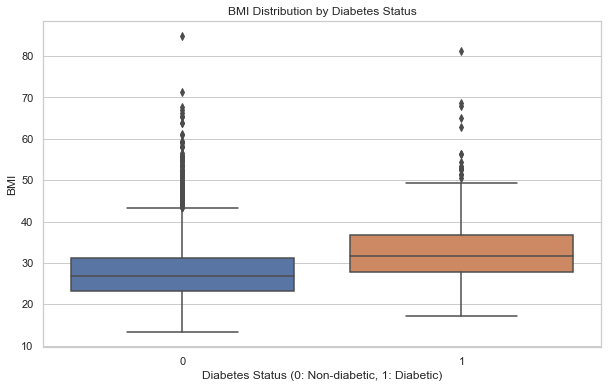

In [16]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a boxplot to compare BMI distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='bmi', data=bmi_data)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('BMI')
plt.show()

In [17]:
# SQL query to retrieve age and diabetes status
age_query = "SELECT age, diabetes FROM diabetes_data"
age_data = pd.read_sql_query(age_query, conn)

# Identify numerical columns
sample_query = "SELECT * FROM diabetes_data LIMIT 10;"  
sample_data = pd.read_sql_query(sample_query, conn)

numerical_cols = sample_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# SQL query to retrieve numerical columns for the correlation heatmap
corr_query = corr_query = "SELECT " + ", ".join(numerical_cols) + " FROM diabetes_data"
corr_data = pd.read_sql_query(corr_query, conn)

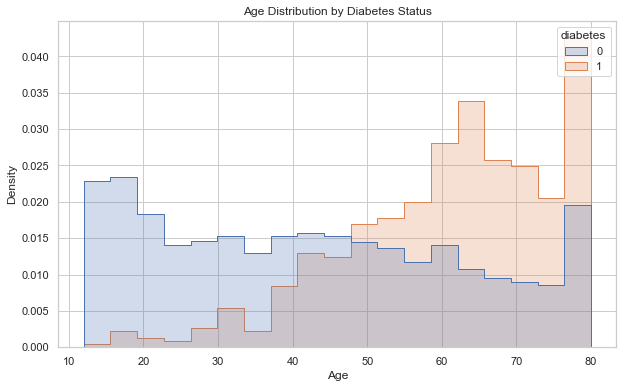

In [18]:
# Set the style
sns.set(style="whitegrid")

# Create a histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=age_data, x='age', hue='diabetes', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

### Visualization 2: Correlation Heatmap


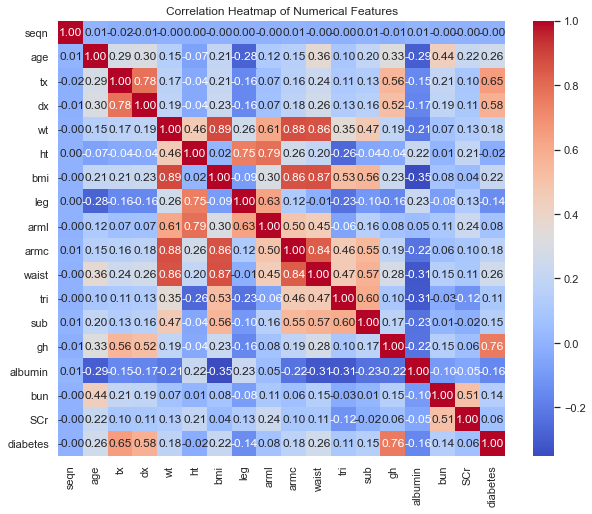

In [19]:
# Calculating correlation
corr = corr_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [20]:
# SQL query to retrieve 're', 'income', and 'diabetes' columns
query = """
SELECT re, income, diabetes
FROM diabetes_data  
"""

# Retrieve the data
data = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

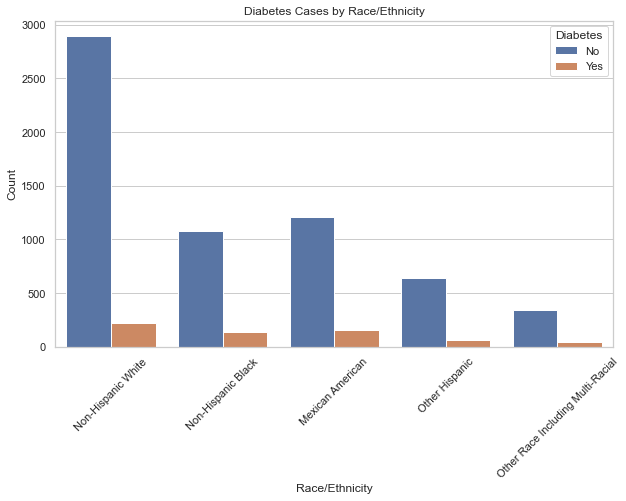

In [21]:
# Count plot for 're' column with hue as 'diabetes'
plt.figure(figsize=(10, 6))
sns.countplot(x='re', hue='diabetes', data=data)
plt.title('Diabetes Cases by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

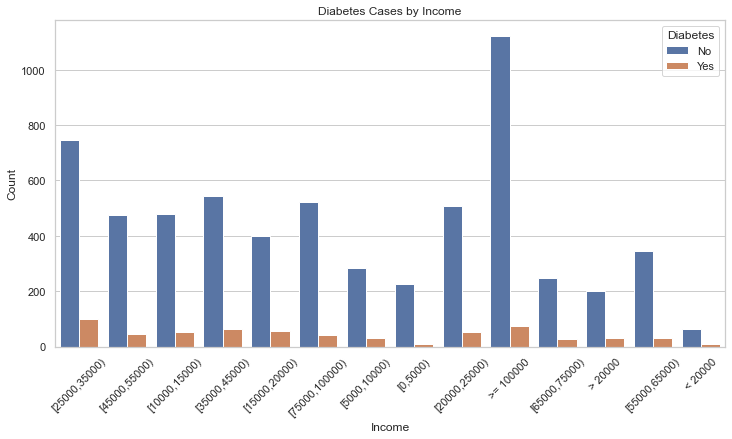

In [22]:
# Count plot for 'income' column with hue as 'diabetes'
plt.figure(figsize=(12, 6))
sns.countplot(x='income', hue='diabetes', data=data)
plt.title('Diabetes Cases by Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

### Data Modelling - Logistic Regression

In [23]:
data_encoded['diabetes'] = (data_encoded['gh'] >= 6.5).astype(int)

In [24]:
# Drop the original 'gh' column
data_encoded.drop('gh', axis=1, inplace=True)

In [25]:
# Split the data into features and target
X = data_encoded.drop('diabetes', axis=1)  # All columns except the target
y = data_encoded['diabetes']  # Target column

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

LogisticRegression()

In [27]:
# Predictions
y_pred = logreg.predict(X_test)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1224
           1       0.43      0.07      0.12       135

    accuracy                           0.90      1359
   macro avg       0.67      0.53      0.53      1359
weighted avg       0.86      0.90      0.86      1359

Confusion Matrix:
 [[1212   12]
 [ 126    9]]
Accuracy: 0.8984547461368654


In [28]:
# Define the parameter grid with compatible combinations
param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'max_iter': [100, 200, 300]},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2', 'none'], 'solver': ['lbfgs', 'newton-cg', 'sag'], 'max_iter': [100, 200, 300]},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'max_iter': [100, 200, 300], 'l1_ratio': [0.5]}
]

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Initialize the GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize the model with the best parameters
best_logreg = LogisticRegression(**best_params)

# Train the model on the training data
best_logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = best_logreg.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1224
           1       0.71      0.66      0.68       135

    accuracy                           0.94      1359
   macro avg       0.84      0.81      0.83      1359
weighted avg       0.94      0.94      0.94      1359

Confusion Matrix:
 [[1188   36]
 [  46   89]]
Accuracy: 0.9396615158204562


## Decision Tree

In [29]:
# Assuming 'diabetes' is your target column
X = data_encoded.drop('diabetes', axis=1)
y = data_encoded['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1224
           1       0.46      0.46      0.46       135

    accuracy                           0.89      1359
   macro avg       0.70      0.70      0.70      1359
weighted avg       0.89      0.89      0.89      1359

Confusion Matrix:
 [[1152   72]
 [  73   62]]
Accuracy: 0.8933038999264165


In [32]:
# Hyperparameters to tune
param_grid = {'max_depth': [3, 5, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_tree = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_tree.predict(X_test)
print("Classification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))
print("Accuracy (Best Model):", accuracy_score(y_test, y_pred_best))


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1224
           1       0.72      0.72      0.72       135

    accuracy                           0.94      1359
   macro avg       0.84      0.84      0.84      1359
weighted avg       0.94      0.94      0.94      1359

Confusion Matrix (Best Model):
 [[1186   38]
 [  38   97]]
Accuracy (Best Model): 0.9440765268579838


## Random Forest

In [33]:
# Assuming 'diabetes' is your target column
X = data_encoded.drop('diabetes', axis=1)
y = data_encoded['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [35]:
# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1224
           1       0.73      0.65      0.69       135

    accuracy                           0.94      1359
   macro avg       0.85      0.81      0.83      1359
weighted avg       0.94      0.94      0.94      1359

Confusion Matrix:
 [[1192   32]
 [  47   88]]
Accuracy: 0.94186902133922


In [36]:
# Hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search_rf.best_params_)

# Best model
best_rf = grid_search_rf.best_estimator_

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)
print("Classification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))
print("Accuracy (Best Model):", accuracy_score(y_test, y_pred_best))


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1224
           1       0.73      0.69      0.71       135

    accuracy                           0.94      1359
   macro avg       0.85      0.83      0.84      1359
weighted avg       0.94      0.94      0.94      1359

Confusion Matrix (Best Model):
 [[1190   34]
 [  42   93]]
Accuracy (Best Model): 0.9440765268579838
